# Standardize Filters

* We are using lots of different filter traces, especially when we combine the UAT Groups project and Virgo.
* We have filter traces from lots of different sources.
* I want to write them out in a uniform way, with wavelength and transmission in the same units for all.
* I also want to write them in fits format so we can easily store the units and column names.

In [8]:
import os
from matplotlib import pyplot as plt
import numpy as np
from astropy.table import Table
from astropy.io import ascii
import glob
homedir = os.getenv("HOME")

# NOTES

* made a directory in ~/research/Halpha-filters
* put all the traces there
* will read each in and write out a fits version

In [ ]:
def write_fits_output(wavelength, transmission, fname):
    # create a table, 

    # create column names

    # add units

    # write out

    pass

In [56]:
target_dir = os.path.join(homedir,'research/Halpha_filters/halphagui')
os.chdir(target_dir)

flist = glob.glob('*.*')
print(flist)

for f in flist:
    # read in file

    # convert as necessary

    # write out results

['ha4-sim04.txt', 'kpno-harris-R-k1004.txt', 'ha16-sim04.txt', 'wfc-int-197-halpha.txt', 'ha8-sim04.txt', 'chroma-halpha-transmission-ascii.txt', 'wfc-int-227-ha6657.txt', 'ha12-sim04.txt', 'wfc-int-sloan-r.txt', 'kpno-sdss-r-k1018.txt', 'BASS-g.txt', 'BASS-r.txt']


In [6]:
# get filters already in halphagui/filter_traces

# write out filters in A, T(%) and save in filter_traces

# move the original files to filter_traces/orig_format



['HDI_R_Harrisr_nohead.txt', 'HDI_ha12_W9_6700f_nohead.txt', 'HDI_ha8_W9_6660f_nohead.txt']
HDI_R_Harrisr_nohead.txt
HDI_ha12_W9_6700f_nohead.txt
HDI_ha8_W9_6660f_nohead.txt


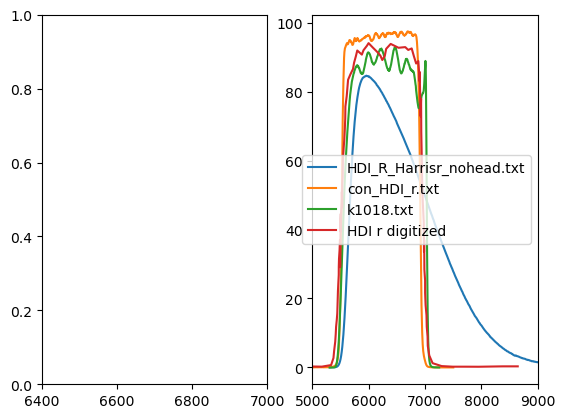

In [43]:
# get filters from Becky - save these in github too - maybe make a subdirectory filter_traces/orig_format
os.chdir('/Users/rfinn/research/Virgo/filters/')
filter_list = glob.glob('*nohead.txt')
filter_list.sort()
print(filter_list)
# read in each filter
plt.figure()
for f in filter_list:
    print(f)
    if f.startswith('HDI_6700'):
        continue
    try:
        dat = np.loadtxt(f)
    except ValueError:
        dat = np.loadtxt(f, skiprows=15)
    if f.find('ha') > -1:
        plt.subplot(1,2,1)
        continue
    else:
        plt.subplot(1,2,2)
    plt.plot(dat[:,0],dat[:,1],label=f)
files = ['con_HDI_r.txt', 'k1018.txt']
for f in files:
    try:
        dat = np.loadtxt(f)
    except ValueError:
        dat = np.loadtxt(f, skiprows=15)
    plt.subplot(1,2,2)
    if np.max(dat[:,1]) < 10:
        trans = dat[:,1]*100
    else:
        trans = dat[:,1]
    plt.plot(dat[:,0],trans,label=f)
hdi_r = os.getenv("HOME")+"/research/Halpha-filters/hdi_digitized/HDI_r.csv"
dat = ascii.read(hdi_r, format='csv', data_start=1)
wav = dat['x']*10
T = dat['y']
isort = np.argsort(wav)
plt.plot(wav[isort], T[isort], label='HDI r digitized')
plt.legend()
plt.subplot(1,2,1)
plt.xlim(6400,7000)
plt.subplot(1,2,2)
plt.xlim(5000,9000)
plt.legend()
plt.subplot(1,2,2)
plt.legend()
plt.show()
# write out filters in A, T(%) and save in filter_traces

['HDI_R_Harrisr_nohead.txt', 'HDI_ha12_W9_6700f_nohead.txt', 'HDI_ha8_W9_6660f_nohead.txt']
HDI_R_Harrisr_nohead.txt
HDI_ha12_W9_6700f_nohead.txt
HDI_ha8_W9_6660f_nohead.txt


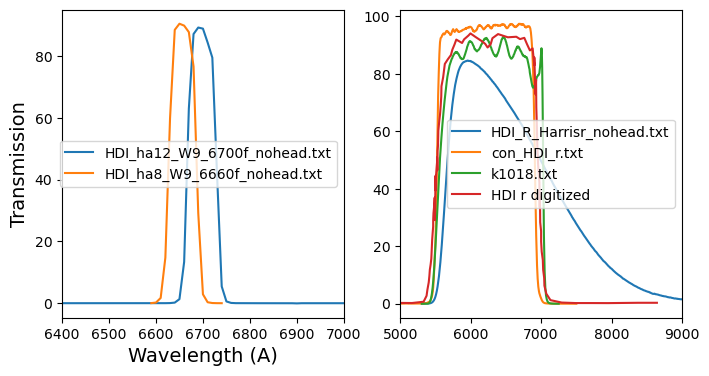

In [53]:
# get filters from Becky - save these in github too - maybe make a subdirectory filter_traces/orig_format
os.chdir('/Users/rfinn/research/Virgo/filters/')
filter_list = glob.glob('*nohead.txt')
filter_list.sort()
print(filter_list)
# read in each filter
plt.figure(figsize=(8,4))
for f in filter_list:
    print(f)
    if f.startswith('HDI_6700'):
        continue
    try:
        dat = np.loadtxt(f)
    except ValueError:
        dat = np.loadtxt(f, skiprows=15)
    if f.find('ha') > -1:
        plt.subplot(1,2,1)
        #continue
    else:
        plt.subplot(1,2,2)
    plt.plot(dat[:,0],dat[:,1],label=f)
files = ['con_HDI_r.txt', 'k1018.txt']
for f in files:
    try:
        dat = np.loadtxt(f)
    except ValueError:
        dat = np.loadtxt(f, skiprows=15)
    plt.subplot(1,2,2)
    if np.max(dat[:,1]) < 10:
        trans = dat[:,1]*100
    else:
        trans = dat[:,1]
    plt.plot(dat[:,0],trans,label=f)
hdi_r = os.getenv("HOME")+"/research/Halpha-filters/hdi_digitized/HDI_r.csv"
dat = ascii.read(hdi_r, format='csv', data_start=1)
wav = dat['x']*10
T = dat['y']
isort = np.argsort(wav)
plt.plot(wav[isort], T[isort], label='HDI r digitized')
plt.legend()
plt.subplot(1,2,1)
plt.xlim(6400,7000)
plt.subplot(1,2,2)
plt.xlim(5000,9000)
plt.legend()
plt.subplot(1,2,1)
plt.legend()
plt.xlabel("Wavelength (A)",fontsize=14)
plt.ylabel("Transmission",fontsize=14)
plt.show()
# write out filters in A, T(%) and save in filter_traces